# Und. Unc. Assignment 3
### Harrison Witt
Do 4 of 5

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [2]:
# Opening the nhanes dataset

import pandas as pd
import numpy as np
nhanes = pd.read_csv('../data/nhanes_data_17_18.csv')
# nhanes.head()


# Finding 2 categorical vars of interest (used DataWrangler to visualize first)
two_vars = nhanes[['Past30DayMilkProductConsumption', 'GeneralHealthCondition']]
# two_vars.head()

# Investigating the missing values of the two variables
missing_values = two_vars.isnull().sum()
print(missing_values)
print('\n')

# Investigating the percentage missing of the two variables
SEQN = nhanes['SEQN']
missing_percentage = (missing_values / len(SEQN)) * 100
print(missing_percentage)
print('\n')


# Computing contingency table for X and Y
contingency_table = pd.crosstab(
    two_vars['Past30DayMilkProductConsumption'],
    two_vars['GeneralHealthCondition'],
    margins=True  # adds row/column totals
)

print(contingency_table)

Past30DayMilkProductConsumption       1
GeneralHealthCondition             2402
dtype: int64


Past30DayMilkProductConsumption     0.011953
GeneralHealthCondition             28.711451
dtype: float64


GeneralHealthCondition                              Excellent  Fair or  Good  \
Past30DayMilkProductConsumption                                                
Never                                                      98      254   460   
Often-once a day or more?                                 263      315   763   
Rarely-less than once a week                               96      271   512   
Sometimes-once a week or more but less than onc...        161      330   706   
Varied                                                      1        5    12   
All                                                       619     1175  2453   

GeneralHealthCondition                              Poor?  Very good   All  
Past30DayMilkProductConsumption                                             
Nev

C:\Users\witth\AppData\Local\Temp\ipykernel_6340\3151176314.py:5: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv('../data/nhanes_data_17_18.csv')


**Interesting Patterns:**

**Individuals who consume milk products (once a day or more) more frequently report better general health (high counts in the good, very good, and excellent categories). In contrast, those who report that they never consume milk products show relatively larger proportions in the fair and poor health categories. The rarely and sometimes groups fall in between, which indicates that more frequent milk product consumption is associated with self-reported better health. Note that this does not imply causation, but hopefulyl does lead to further research.**

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

HowOftenDoYouFeelWorriedOrAnxious    2925
dtype: int64


HowOftenDoYouFeelWorriedOrAnxious    34.962945
dtype: float64



Descriptive statistics of HowOftenDoYouFeelWorriedOrAnxious by Past30DayMilkProductConsumption :

                                                       n  mean   std  median  \
Past30DayMilkProductConsumption                                                
Never                                               1156  1.65  1.44     1.0   
Often-once a day or more?                           1531  1.52  1.39     1.0   
Rarely-less than once a week                        1173  1.64  1.38     1.0   
Sometimes-once a week or more but less than onc...  1561  1.64  1.35     1.0   
Varied                                                20  1.10  1.45     0.5   

                                                    q25  q75  ymin  ymax  
Past30DayMilkProductConsumption                                           
Never                                               0.0  3.0   0.0   

C:\Users\witth\AppData\Local\Temp\ipykernel_6340\2530880380.py:22: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df_xy[X_COL]):
C:\Users\witth\AppData\Local\Temp\ipykernel_6340\2530880380.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_xy.groupby(X_COL)[Y_COL]


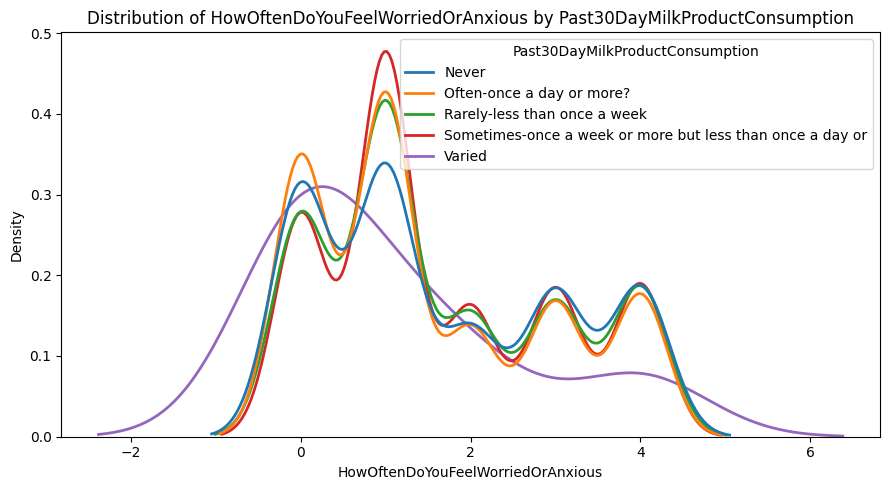

In [3]:
# Numerical var of interest
num_var = nhanes[['HowOftenDoYouFeelWorriedOrAnxious']]

# Investigating the missing values of the variable
missing_value = num_var.isnull().sum()
print(missing_value)
print('\n')

# Investigating the percentage missing of the variable
SEQN = nhanes['SEQN'] 
missing_perc = (missing_value / len(SEQN)) * 100
print(missing_perc)
print('\n')

X_COL = "Past30DayMilkProductConsumption"   # categorical X
Y_COL = "HowOftenDoYouFeelWorriedOrAnxious"  # numeric Y 

cols = [X_COL, Y_COL]
df_xy = nhanes[cols].dropna()  # dropping rows missing X or Y

# Ensuring X is treated as categorical
if not pd.api.types.is_categorical_dtype(df_xy[X_COL]):
    df_xy[X_COL] = df_xy[X_COL].astype("category")

# Descriptive table (Y stats within levels of X)
desc_tbl = (
    df_xy.groupby(X_COL)[Y_COL]
         .agg(
             n="size",
             mean="mean",
             std="std",
             median="median",
             q25=lambda s: s.quantile(0.25),
             q75=lambda s: s.quantile(0.75),
             ymin="min",
             ymax="max",
         )
         .round(2)
         .sort_index()
)
print("\nDescriptive statistics of", Y_COL, "by", X_COL, ":\n")
print(desc_tbl)

# Counts per category only
cat_counts = df_xy[X_COL].value_counts().sort_index()
print("\nSample size by", X_COL, ":\n")
print(cat_counts)

# Grouped kernel density plots of Y given X
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,5))
sns.kdeplot(
    data=df_xy,
    x=Y_COL,
    hue=X_COL,
    common_norm=False,  # density for each group sums to 1
    linewidth=2,
    fill=False
)
plt.title(f"Distribution of {Y_COL} by {X_COL}")
plt.xlabel(Y_COL)
plt.ylabel("Density")
plt.tight_layout()
plt.show()


**The descriptive statis and density plots show that reported frequency of feeling worried or anxious does not vary much across the milk consumption categories. The means and medians are quite similar, with most groups clustering around the same values, and the density curves largely overlap. I do see that the varied group shows a more dispersed distribution with a lower mean, but this is likely chalked up to limited data. Overall, there is little evidence of a strong relationship between milk product consumption and self-reported anxiety levels in this data.**

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

**Note that I wrote my derivation on paper. Then I realized the assignment submission had to be a github link. So I tried to format it in markdown but couldn't get the formatting right. But the equations should be correct, or at least they represent my attempt at the solution.**

### Derivation: Minimizing weighted MSE ⇒ Nadaraya–Watson

For a fixed query point \(z\), consider the **locally weighted** mean–squared error:

\[
\text{MSE}\big(\hat y(z)\big)
= \frac{1}{N}\sum_{i=1}^N \big(y_i-\hat y(z)\big)^2 \, w_i(z),
\qquad
w_i(z)=\frac{1}{h}\,k\!\left(\frac{z-x_i}{h}\right)\ge 0.
\]

The factor \(1/N\) is irrelevant for the minimizer.

---

**Step 1. Differentiating w.r.t. \(\hat y(z)\):**

\[
\frac{\partial}{\partial \hat y(z)} \text{MSE}\big(\hat y(z)\big)
= \frac{1}{N}\sum_{i=1}^N 2\big(\hat y(z)-y_i\big)\, w_i(z).
\]

\[
= \frac{2}{N}\left[\hat y(z)\sum_{i=1}^N w_i(z) - \sum_{i=1}^N w_i(z)\,y_i\right].
\]

---

**Step 2. Setting derivative = 0:**

\[
\hat y(z)\sum_{i=1}^N w_i(z) \;=\; \sum_{i=1}^N w_i(z)\,y_i.
\]

---

**Step 3. Solving for \(\hat y(z)\):**

\[
\hat y(z) \;=\; 
\frac{\sum_{i=1}^N w_i(z)\,y_i}{\sum_{i=1}^N w_i(z)}
= \frac{\sum_{i=1}^N k\!\left(\frac{z-x_i}{h}\right)y_i}
        {\sum_{i=1}^N k\!\left(\frac{z-x_i}{h}\right)}.
\]

This is the Locally Constant Least Squares (LCLS) / Nadaraya–Watson estimator

---

**Step 4. Second derivative check:**

\[
\frac{\partial^2}{\partial \hat y(z)^2} \text{MSE}\big(\hat y(z)\big)
= \frac{2}{N}\sum_{i=1}^N w_i(z) \;\ge\; 0.
\]

It is strictly positive whenever at least one \(w_i(z)>0\).  
Hence, the weighted average above uniquely minimizes the objective.


4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [14]:
class NadarayaWatson:
    
    # Initializing the estimator (univariate X only)
    def __init__(self, kernel: str = "gaussian", bandwidth: float | None = None):
        self.kernel = kernel
        self.h = bandwidth
        self.x = None
        self.y = None

    # Defining kernel functions
    def _kernel(self, u: np.ndarray) -> np.ndarray:
        if self.kernel == "gaussian":
            # Returning standard normal pdf
            return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)
        elif self.kernel == "epanechnikov":
            out = np.maximum(0.0, 1.0 - u**2)
            # Forcing Epanechnikov kernel to integrate to 1
            return 0.75 * out
        elif self.kernel == "triangular":
            # Returning triangular kernel
            return np.maximum(0.0, 1.0 - np.abs(u))
        else:
            raise ValueError(f"Unknown kernel: {self.kernel}")

    # Computing Silverman plug-in bandwidth
    @staticmethod
    def _silverman_bandwidth(x: np.ndarray) -> float:
        x = np.asarray(x, dtype=float)
        n = x.size
        if n < 2:
            return 1.0  
        std = np.std(x, ddof=1)
        iqr = np.subtract(*np.percentile(x, [75, 25]))
        sigma = min(std, iqr / 1.34) if (std > 0 or iqr > 0) else 1.0
        h = 0.9 * sigma * n ** (-1/5)
        # Guarding against zero bandwidth
        return float(h if h > 0 else 1e-8)

    # Fitting the model to training data
    def fit(self, x: np.ndarray, y: np.ndarray):
        x = np.asarray(x, dtype=float).reshape(-1)
        y = np.asarray(y, dtype=float).reshape(-1)
        if x.shape[0] != y.shape[0]:
            raise ValueError("x and y must have the same length.")
        self.x, self.y = x, y
        # Setting bandwidth if not provided
        if self.h is None:
            self.h = self._silverman_bandwidth(self.x)
        return self

    # Predicting conditional expectation for new z values
    def predict(self, z: np.ndarray) -> np.ndarray:
        """
        Computing Nadaraya–Watson estimate:
        sum_i K((z - x_i)/h) y_i / sum_i K((z - x_i)/h)
        """
        if self.x is None:
            raise RuntimeError("Call fit() before predict().")
        z = np.asarray(z, dtype=float).reshape(-1)

        # Computing weights in vectorized fashion
        u = (z[:, None] - self.x[None, :]) / self.h
        w = self._kernel(u)

        # Computing numerator and denominator
        num = (w * self.y[None, :]).sum(axis=1)
        den = w.sum(axis=1)

        # Avoiding divide-by-zero by returning NaN when no weight
        out = np.where(den > 0, num / den, np.nan)
        return out

# Defining convenience function for single-call usage
def nw_predict(x, y, z, kernel="gaussian", bandwidth=None):
    """
    Running Nadaraya–Watson prediction in one step
    If bandwidth is None, using Silverman plug-in rule on x
    """
    model = NadarayaWatson(kernel=kernel, bandwidth=bandwidth).fit(x, y)
    return model.predict(z)


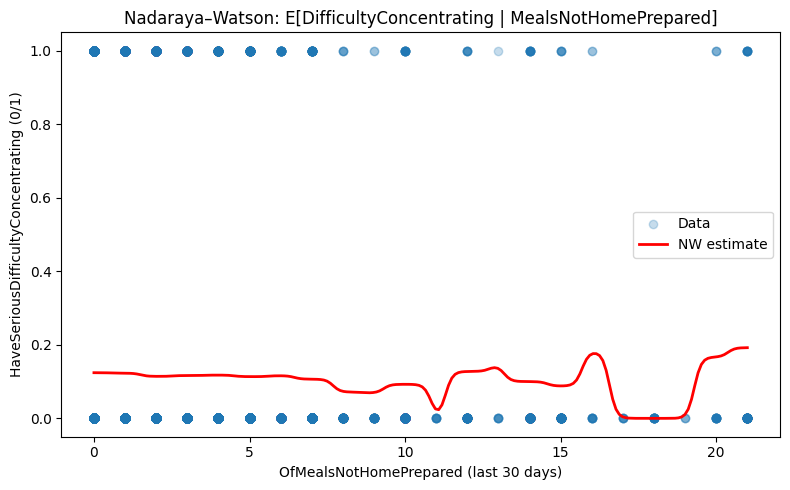

In [15]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

# Extracting raw variables
x_raw = nhanes['OfMealsNotHomePrepared'].copy()
y_raw = nhanes['HaveSeriousDifficultyConcentrating'].copy()

# Marking special NHANES codes as missing
bad_codes = {7777, 9999, 77777, 99999}
x_raw = x_raw.mask(x_raw.isin(bad_codes))

# Restricting X to a plausible range (0–90 meals in last 30 days)
x_raw = x_raw.mask((x_raw < 0) | (x_raw > 90))

# Dropping rows with missing values in either variable
mask = ~(x_raw.isna() | y_raw.isna())
x = x_raw[mask].to_numpy()
y = y_raw[mask].to_numpy()

# Defining a safer Silverman bandwidth function
def silverman_safe(x):
    x = np.asarray(x, float).ravel()
    n = x.size
    if n < 2:
        return 1.0
    std = np.std(x, ddof=1)
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    # Handling edge case when IQR and std are zero
    if iqr == 0 and std == 0:
        return 1.0
    sigma = std if iqr == 0 else min(std, iqr/1.34)
    h = 0.9 * sigma * n ** (-1/5)
    return max(h, 1e-6)

# Building prediction grid
z_grid = np.linspace(x.min(), x.max(), 200)

# Running NW prediction with safe bandwidth
y_hat = nw_predict(x, y, z_grid, kernel="gaussian", bandwidth=silverman_safe(x))

# Plotting results
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.25, label="Data")
plt.plot(z_grid, y_hat, linewidth=2, color="red", label="NW estimate")
plt.title("Nadaraya–Watson: E[DifficultyConcentrating | MealsNotHomePrepared]")
plt.xlabel("OfMealsNotHomePrepared (last 30 days)")
plt.ylabel("HaveSeriousDifficultyConcentrating (0/1)")
plt.legend()
plt.tight_layout()
plt.show()



My Nadaraya–Watson estimate indicates that the probability of reporting serious difficulty concentrating remains fairly stable, around 10–20%, across most values of meals not prepared at home. The smoothed curve shows only minor fluctuations, and these small bumps at higher meal counts appear to be driven by limited data in that range. In the lower range, where most observations fall, the estimate is flat and consistent, suggesting little evidence of a strong association. Overall, the analysis points to no meaningful relationship between meal-preparation frequency and reported concentration difficulties.

In [16]:
!jupyter nbconvert --to pdf HarrisonWitt_assn3.ipynb

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run script troubleshoot

Jupyter command `jupyter-nbconvert` not found.
